## Training Yolo v8 for instance segmentation on butterfly images

[YOLO Instance Segmentation Docs](https://docs.ultralytics.com/tasks/segment/)

In [1]:
# import pip
# pip.main(["install", "ultralytics"])

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from skimage.draw import polygon2mask

%matplotlib inline

: 

In [2]:
#define path to yaml file containing info about our dataset
YAML     = '/fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/dataset_splits_yolo/yolo_wing_segmentation.yaml'
EPOCHS   = 50
IMG_SIZE = 256

use_cuda = torch.cuda.is_available()
DEVICE   = torch.device("cuda:0" if use_cuda else "cpu")
print("Device: ", DEVICE)

if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

Device:  cuda:0
__CUDNN VERSION: 8902
__Number CUDA Devices: 1
__CUDA Device Name: Tesla P100-PCIE-16GB
__CUDA Device Total Memory [GB]: 17.06688512


## Train YOLO for Segmentation on Butterfly Dataset

https://docs.ultralytics.com/usage/cfg/#augmentation 

https://docs.ultralytics.com/tasks/segment/

In [3]:
# Load a pretrained model
# model = YOLO('yolov8n-seg.pt')  # load an official pretrained model
model = YOLO('yolov8m-seg.pt')

# Train the model
# save_name = 'yolov8m_no_data_aug'
# save_name = 'yolov8m_shear_10.0_scale_0.5_translate_0.1' 
save_name = 'yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0' ##USE THIS ONE

results = model.train(data=YAML, 
                      imgsz=IMG_SIZE,
                      epochs=EPOCHS, 
                      batch=16,
                      device=DEVICE,
                      optimizer='auto',
                      verbose=True,
                      val=True,
                      project='/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models',
                      name = save_name,
                      shear=10.0,
                      scale=0.5, 
                      translate=0.1,
                      fliplr = 0.0 ##RETRAIN with this UNCOMMENTED (default is 0.5 so that may be affecting our results)
                     )



New https://pypi.org/project/ultralytics/8.0.228 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/dataset_splits_yolo/yolo_wing_segmentation.yaml, epochs=50, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models, name=yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fals

2023-12-20 23:25:21.056985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 23:25:21.057055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 23:25:21.326674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

train: Scanning /fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/datas
val: Scanning /fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/dataset


Plotting labels to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.37G      0.587     0.9669      1.699      1.006        205   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.936       0.88      0.879      0.814      0.943      0.888      0.886      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.39G      0.447     0.5717     0.5839     0.8875        174   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.966      0.881       0.89      0.829      0.966      0.881       0.89      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G       0.46     0.5632     0.5259     0.8908        152   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.951      0.865      0.879      0.797      0.976      0.881      0.893       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.37G     0.4314     0.4922     0.4622     0.8834        146   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.975      0.897      0.894      0.811      0.975      0.897      0.895      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.39G     0.4347     0.4871     0.4564     0.8847        141   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.824      0.871       0.87      0.814      0.933      0.867      0.873      0.742



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G     0.4185      0.522     0.4334     0.8809        164   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.897      0.924      0.861      0.983      0.897      0.924      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.38G     0.4092     0.4599     0.4194     0.8759        149   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.976      0.892      0.898      0.844      0.981      0.895      0.899      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G     0.4086     0.4603     0.4067     0.8729        140   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.977      0.889       0.89      0.836      0.971      0.887      0.883      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.37G     0.3921     0.4441     0.3894     0.8701        183   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.974      0.867      0.896      0.838      0.972      0.865      0.896      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.37G      0.387     0.4394     0.3829     0.8688        200   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.968      0.877      0.904      0.863      0.976      0.884      0.911      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.36G     0.3775     0.4477     0.3775     0.8674        148   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.974      0.895      0.902      0.849      0.985      0.896      0.902      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.38G     0.3776     0.4358     0.3698     0.8667        171   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.973      0.897      0.897       0.85      0.973      0.897      0.897      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.38G     0.3812     0.4254     0.3668     0.8634        138   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.889      0.901      0.841      0.986      0.897      0.902      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.49G     0.3505     0.3863     0.3382     0.8586        147   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.982      0.888      0.901      0.858      0.989      0.895      0.904      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.64G      0.356     0.3958     0.3387     0.8618        153   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.989      0.888        0.9       0.86      0.983      0.896      0.902      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.41G     0.3516     0.4057     0.3363     0.8578        146   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.979      0.896      0.904      0.871      0.979      0.896      0.904      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G     0.3398     0.3696     0.3141     0.8556        166   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.988      0.886      0.897      0.867       0.99      0.896      0.902      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.39G     0.3417      0.373     0.3238     0.8558        156   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.984      0.889      0.898       0.87      0.991      0.896        0.9      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.59G     0.3406     0.3717     0.3152     0.8572        211   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.991      0.897      0.911      0.869      0.991      0.897      0.911      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.36G     0.3311     0.3558     0.3119     0.8527        159   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.871      0.923      0.922      0.892      0.877       0.93      0.929      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.37G     0.3217     0.3301     0.2919     0.8495        185   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.895      0.863      0.992      0.897      0.902      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.58G     0.3313     0.3621     0.3054     0.8522        170   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.878      0.956      0.925      0.884      0.885      0.963      0.927      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.36G     0.3283     0.3533     0.3011     0.8482        163   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.991      0.896      0.904      0.874      0.991      0.896      0.905      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.37G     0.3167     0.3364     0.2815     0.8473        172   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.987      0.889      0.892      0.875      0.991      0.897      0.897      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.37G     0.3169     0.3338      0.289     0.8501        184   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.981      0.889      0.893      0.872      0.988      0.896      0.898      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.35G     0.3096     0.3282     0.2814     0.8507        191   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.889      0.901      0.876       0.99      0.897      0.905      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.35G     0.3007     0.3238     0.2791     0.8456        158   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.899      0.873      0.991      0.897      0.901      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.41G     0.2979     0.3271     0.2786     0.8481        144   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.988      0.887      0.897      0.868       0.99      0.895      0.903       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.35G     0.2991      0.331     0.2804     0.8493        160   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.883      0.898      0.867       0.99      0.892      0.903       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.41G     0.3071     0.3643     0.2893     0.8514        159   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.984      0.889      0.895      0.869      0.991      0.896      0.898       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.41G     0.2947     0.3292     0.2721     0.8414        162   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.984      0.886      0.892      0.866      0.991      0.894      0.899      0.815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.41G     0.2865     0.3117     0.2641     0.8458        138   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.987      0.889      0.892      0.873      0.991      0.897      0.896       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.35G     0.2842     0.3104     0.2639     0.8438        168   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.896      0.896      0.879      0.986      0.895      0.896      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.41G     0.2852     0.3276     0.2633     0.8466        137   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.987      0.888      0.891      0.877      0.992      0.895      0.896      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.35G     0.2826     0.3053     0.2568     0.8433        171   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.991      0.887      0.894       0.88      0.988      0.897        0.9      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.35G     0.2803     0.3037     0.2562     0.8414        160   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.894      0.879      0.992      0.897      0.898      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G     0.2763     0.3167     0.2527     0.8455        132   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.898      0.879      0.992      0.897      0.902      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.41G     0.2731     0.2903     0.2436      0.843        172   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.895      0.882      0.992      0.897      0.898      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.56G     0.2783     0.3104     0.2488     0.8475        170   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.986       0.89      0.897      0.881      0.992      0.897      0.897       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.35G     0.2642     0.2933     0.2425     0.8394        143   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.897      0.897      0.884      0.983      0.897      0.897      0.808


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.58G      0.214     0.2342     0.2129     0.8137         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.889      0.898      0.875       0.99      0.897      0.899      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.37G     0.2128     0.2302     0.2094     0.8167         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.978      0.889       0.89      0.875      0.984      0.897      0.895      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.43G     0.2078     0.2281     0.1994     0.8161         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.983      0.889      0.894       0.88      0.989      0.896      0.897      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G     0.2038     0.2382     0.2033     0.8102         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.982      0.888      0.893       0.88      0.989      0.895      0.899        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.37G     0.2001     0.2317     0.1943     0.8118         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.984      0.889      0.893      0.881      0.991      0.896      0.899      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G     0.1988     0.2214     0.1916     0.8116         77   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.984       0.89      0.891      0.881      0.991      0.897        0.9      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.43G     0.1884     0.2247     0.1831     0.8067         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.893      0.882      0.992      0.897      0.898      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.43G      0.185     0.2303     0.1794     0.8098         84   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.895      0.885      0.992      0.897      0.897      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.43G      0.185     0.2131     0.1804     0.8067         71   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.895      0.886      0.992      0.897      0.898      0.819



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.43G     0.1858     0.2222     0.1726     0.8073         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all         64        358      0.985      0.889      0.892      0.884      0.993      0.897      0.896      0.822



50 epochs completed in 0.152 hours.
Optimizer stripped from /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/weights/last.pt, 54.8MB
Optimizer stripped from /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/weights/best.pt, 54.8MB

Validating /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/weights/best.pt...
Ultralytics YOLOv8.0.222 🚀 Python-3.10.10 torch-2.1.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27228174 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         64        358      0.871      0.923      0.922      0.892      0.877       0.93      0.929      0.823
            background         64          3     0.0795      0.333       0.35      0.305     0.0795      0.333       0.35      0.209
        right_forewing         64         58      0.985      0.983      0.992       0.99      0.985      0.983      0.992      0.985
         left_forewing         64         51      0.964          1      0.989      0.979      0.964          1      0.989      0.969
        right_hindwing         64         59      0.984      0.983      0.995      0.989      0.984      0.983      0.995      0.956
         left_hindwing         64         50      0.948          1       0.99      0.983      0.948          1       0.99      0.943
                 ruler         64         31      0.972          1      0.995      0.941      0.972          1      0.995      0.737
         white_balance         64         18      0.951          1   

In [4]:
#print out metrics
metrics = model.val()
# metrics.box.map    # map50-95(B)
# metrics.box.map50  # map50(B)
# metrics.box.map75  # map75(B)
# metrics.box.maps   # a list contains map50-95(B) of each category
# metrics.seg.map    # map50-95(M)
# metrics.seg.map50  # map50(M)
# metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category

# array([  0.0015378,     0.89711,     0.89991,     0.90443,      0.9035,     0.82305,     0.89682,     0.80595,     0.91695,     0.70794])

# yolo 8n
# Results saved to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/train72
# array([   0.029615,     0.97275,     0.94894,     0.93161,     0.93614,     0.73588,     0.95009,     0.81024,     0.92501,     0.76414])

#yolo-8m ** this is second best, but it confuses left and right bc flip_lr = 0.5 by default** 
# Results saved to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1
# array([   0.043631,      0.9664,     0.94656,     0.95056,     0.94812,     0.80651,      0.9225,     0.84502,     0.92587,     0.81243])

# Results saved to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_no_data_aug2
# array([   0.015237,     0.98289,     0.95798,     0.95832,     0.95468,     0.75121,     0.91373,     0.78447,     0.92841,     0.76938])

#yolo-8m **DEC 20 2023 - USE THIS ONE ACTUALLY**
# Results saved to /fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0
# array([    0.20946,      0.9845,      0.9682,     0.95296,     0.93961,     0.73608,     0.90686,     0.80865,     0.92653,     0.78283])


Ultralytics YOLOv8.0.222 🚀 Python-3.10.10 torch-2.1.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27228174 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/dataset
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         64        358      0.871      0.923      0.922      0.892      0.877       0.93      0.929      0.822
            background         64          3     0.0811      0.333       0.35      0.305     0.0811      0.333       0.35      0.209
        right_forewing         64         58      0.985      0.983      0.992       0.99      0.985      0.983      0.992      0.984
         left_forewing         64         51      0.964          1      0.989       0.98      0.964          1      0.989      0.968
        right_hindwing         64         59      0.984      0.983      0.995      0.989      0.984      0.983      0.995      0.953
         left_hindwing         64         50      0.948          1       0.99      0.983      0.948          1       0.99       0.94
                 ruler         64         31      0.972          1      0.995       0.94      0.972          1      0.995      0.736
         white_balance         64         18      0.951          1   

array([    0.20946,      0.9845,      0.9682,     0.95296,     0.93961,     0.73608,     0.90686,     0.80865,     0.92653,     0.78283])

## Load in Trained Model

In [3]:
#specify checkpoint path
# ckpt_path='/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/train3/weights/best.pt'
# ckpt_path='/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1/weights/best.pt'
ckpt_path='/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/weights/best.pt'

model = YOLO(ckpt_path)

## Visualize Train/Val Results

https://towardsdatascience.com/trian-yolov8-instance-segmentation-on-your-data-6ffa04b2debd

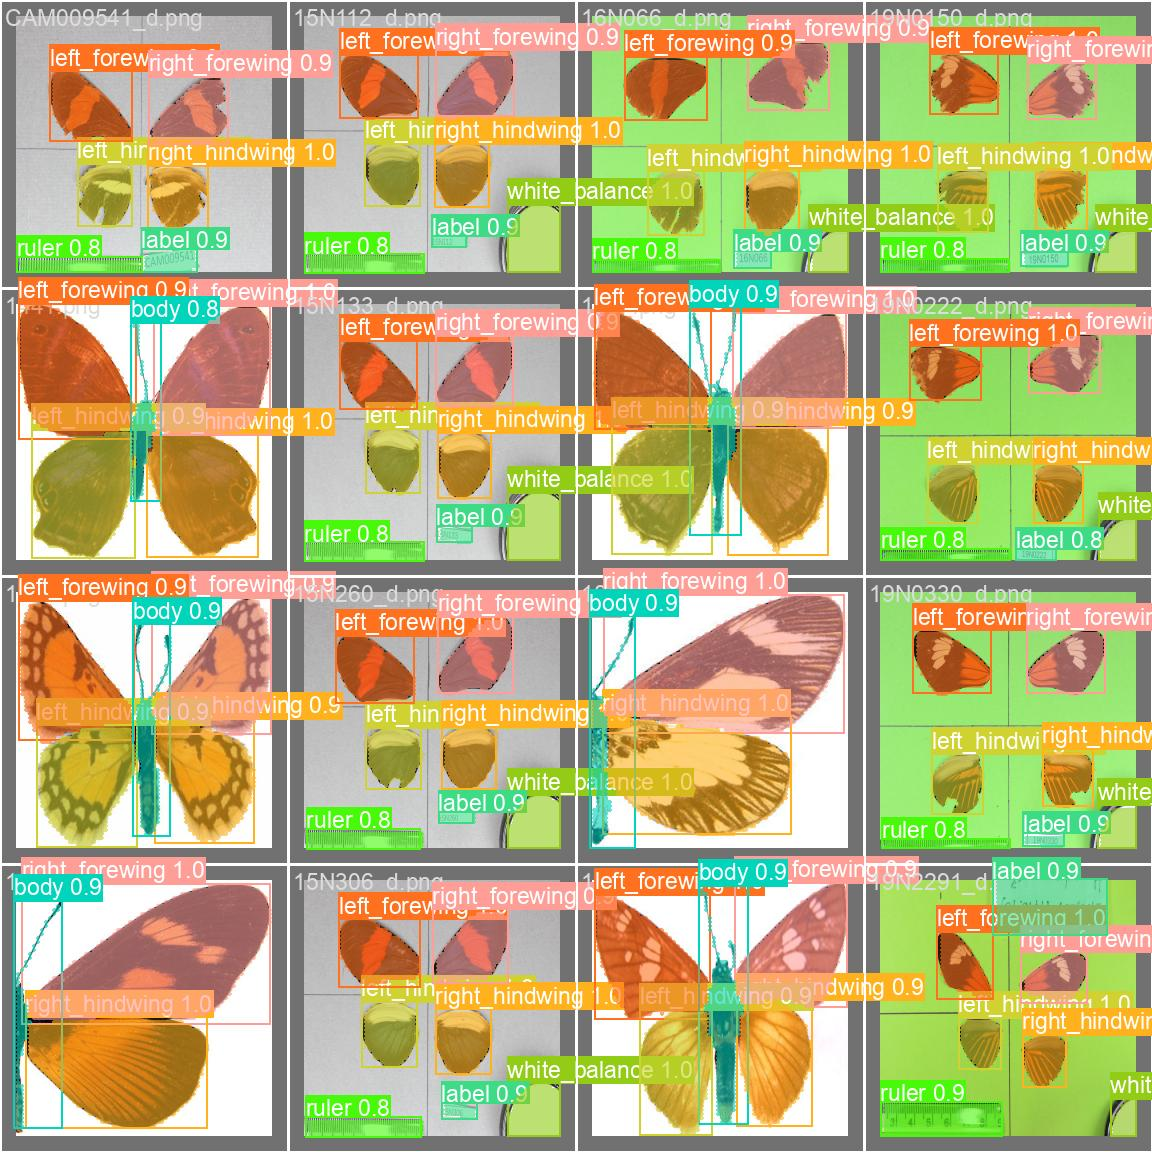

In [19]:
from IPython.display import Image as show_image

# path='/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_no_data_aug2/val_batch0_labels.jpg'
# path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1/val_batch0_labels.jpg'
# path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1/val_batch1_pred.jpg'

path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation/yolo_models/yolov8m_shear_10.0_scale_0.5_translate_0.1_fliplr_0.0/val_batch1_pred.jpg'
show_image(filename=path)

## Predict results

Useful documentation:
- https://docs.ultralytics.com/modes/predict/#plotting-results

In [12]:
# Predict with the model
from PIL import Image

# test_img_path = '/fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/dataset_splits_yolo/images/test/15N123_d.png'
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data_256_256/b2_1_720.png'

# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data/b2_1_720.jpg'
test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data/b2_36_720.jpg'
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data_256_256/b3_6_720.png'

# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/mixed_species/Agraulis_vanillae_IMG_5679.jpg'
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/mixed_species/aoede_f_09-162.jpg'
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/mixed_species/Dione_moneta_IMG_5685.jpg'

results = model.predict(test_img_path, verbose=False)

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save('results.jpg')  # save image
    print('box ids:', r.boxes.cls)

box ids: tensor([2., 8., 3., 1., 4., 8.], device='cuda:0')


## Extracting orientation from forewings and hindwings

In [7]:
classes = {
    0: 'background',
    1: 'right_forewing',
    2: 'left_forewing',
    3: 'right_hindwing',
    4: 'left_hindwing',
    5: 'ruler',
    6: 'white_balance',
    7: 'label',
    8: 'color_card',
    9: 'body'
  }

In [20]:
#predict results on a test image using our trained yolo model
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data_256_256/b3_6_720.png'
test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data/b3_6_720.jpg'
# test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/neil_butterfly_data/b2_4_720.jpg'

# test_img_path ='/fs/ess/PAS2136/Butterfly/annotated_cvat_segmentation_data/images_256_256_corrected_orientations/incomplete/CAM036045_d.png'

#load test image
test_img = cv2.imread(test_img_path, 1)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

results = model.predict(test_img_path, verbose=False)
r = results[0]

In [21]:
test_img.shape

(720, 480, 3)

8.0
2.0
1.0
4.0
3.0
8.0


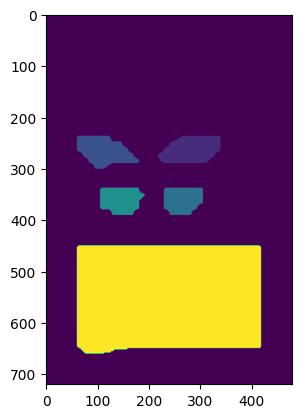

In [22]:
#build the mask for the image and look through all the boxes and masks assigned a forewing or hindwing label
individual_masks = []
#create an empty array to add our masks onto
segmented_img_full = np.zeros(test_img[:,:,0].shape, dtype='uint8')

#get the xyn coordinates and ids of the predicted masks
predicted_class_ids = r.boxes.cls.tolist()
xyn_masks = r.masks.xyn

#build mask for the image
for i, class_id in enumerate(predicted_class_ids):
    print(class_id)
    #get coordinates of polygon
    coords = xyn_masks[i]
    
    #polygon2mask expects coordinates in y,x order so reorder
    #since we're using the normalized xy coordinates, we also multiply x and y 
    #by the target image's width and height so that our masks scale and fit the target img
    coords_adj = [[y * test_img.shape[0], x * test_img.shape[1]] for [x,y] in coords] 

    #build mask from normalized coords
    polygon = np.array(coords_adj)
    mask = polygon2mask(test_img[:,:,0].shape, polygon).astype("uint8")

    #assign the class id as the pixel value for the segment such that
    #instead of 1s and 0s, it'll be class_id's and 0's
    mask *= int(class_id) 

    individual_masks.append(mask)
    #layer the current segment into one collective mask
    segmented_img_full += mask

    for y in range(0, segmented_img_full.shape[0]):
        for x in range(0, segmented_img_full.shape[1]):
            #if there masks overlap at y,x
            if mask[y, x] != 0 and segmented_img_full[y,x] != 0:
                #replace that value to avoid pixel values not in our id2label mapping
                segmented_img_full[y,x] = mask[y,x]
    
    # segmented_img = cv2.bitwise_and(img, img, mask=mask)


plt.imshow(segmented_img_full)


In [23]:
r.boxes.conf

tensor([0.9599, 0.9591, 0.9529, 0.9425, 0.9316, 0.7806], device='cuda:0')

[8.0, 2.0, 1.0, 4.0, 3.0, 8.0]
['color_card', 'left_forewing', 'right_forewing', 'left_hindwing', 'right_hindwing', 'color_card']


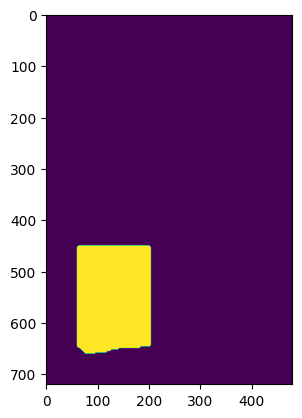

In [29]:
# len(individual_masks) #6
print(r.boxes.cls.tolist())
print([classes[i] for i in r.boxes.cls.tolist()])

i=5
plt.imshow(individual_masks[i])

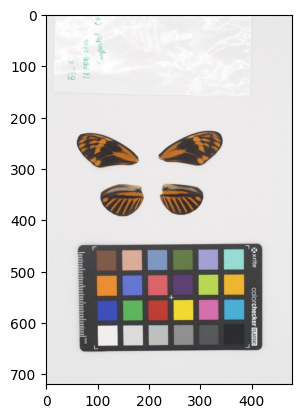

In [34]:
plt.imshow(cv2.cvtColor(r.orig_img, cv2.COLOR_BGR2RGB))

In [35]:
r.orig_img.shape

(720, 480, 3)

In [127]:
#look at a forewing mask for example and try to deduce if its left or right
#this method will not work for hindwings - need to address seperately
idx = 1
mask = individual_masks[idx]
pixel_val = np.max(np.unique(mask))
print("pred pixel val: ", pixel_val)

y_coords = []
x_coords = []
for y in range(0, mask.shape[0]):
    for x in range(0, mask.shape[1]):
        if mask[y,x]==pixel_val:
            x_coords.append(x)
            y_coords.append(y)

x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

leftmost_x = np.min(x_coords) #min x coord (leftmost xcoord of mask)
leftmost_x_idx = np.argmin(x_coords) #the index where the min xcoord is located

rightmost_x = np.max(x_coords) #max x coord (rightmost xcoord of mask)
rightmost_x_idx = np.argmax(x_coords) #the index where the max xcoord is located

# top_y = np.min(y_coords) #min y coord (topmost xcoord of mask)
# top_y_idx = np.argmin(y_coords) #the index where the min ycoord is located

# bottom_y = np.max(y_coords) #max x coord (bottom most ycoord of mask)
# bottom_y_idx = np.argmax(y_coords) #the index where the max ycoord is located

#get the xcoord at the topmost y
left_y_coords = []
right_y_coords = []

for x,y in zip(x_coords, y_coords):
    if x == leftmost_x:
        left_y_coords.append(y)
    if x == rightmost_x:
        right_y_coords.append(y)

min_y_left = np.min(left_y_coords)
min_y_right = np.min(right_y_coords)

if min_y_left < min_y_right:
    print('left forewing')
elif min_y_left > min_y_right:
    print('right forewing')


pred pixel val:  2
left forewing


## Cropping out items from an image using the mask

In [17]:
 #[8., 1., 1., 3., 3., 5.] = [color_card, right_forewing, right_forewing, right_hindwing, right_hindwing, ruler]

# #classes
# names:
#   0: background
#   1: right_forewing
#   2: left_forewing
#   3: right_hindwing
#   4: left_hindwing
#   5: ruler
#   6: white_balance
#   7: label
#   8: color_card
#   9: body

results[0].boxes
class_8_idx = 0
bboxes_xywh = results[0].boxes.xywh
bbox_class_8 = bboxes_xywh[class_8_idx].tolist()
bbox_class_8

[129.95077514648438, 195.7345733642578, 192.2591552734375, 75.06842041015625]

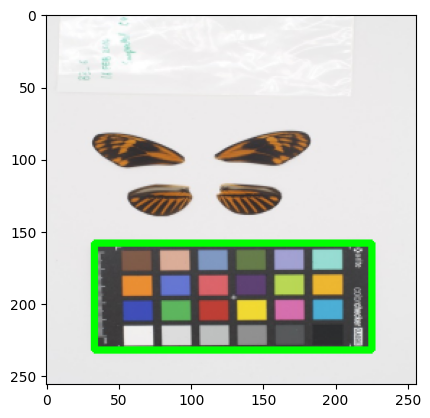

In [18]:
##plotting bounding box around class selected 

#load test image
img = cv2.imread(test_img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#xywh --> x=x_coord of center box, y=y_coord of center of box
x = int(bbox_class_8[0])
y = int(bbox_class_8[1])
w = int(bbox_class_8[2])
h = int(bbox_class_8[3])

#build coords of bottom left and top right corners of bbox
bottom_left = (x - w//2, y - h//2)
top_right = (x + w //2, y + h//2)

#draw rectange on img
cv2.rectangle(img, bottom_left, top_right, (0,255,0), 3)

plt.imshow(img)

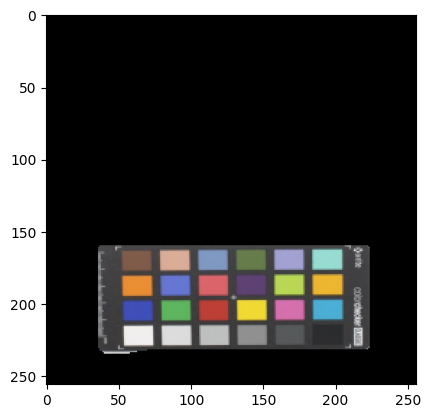

In [19]:
#plot (unnormalized) mask polygon on image
# https://stackoverflow.com/questions/74763263/creating-an-image-mask-using-polygon-points-coordinates÷
import numpy as np
from skimage.draw import polygon2mask

class_idx = 0

#load test image
img = cv2.imread(test_img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# len(results[0].masks.xy) #6 masks
xy_masks = results[0].masks.xy
coords = xy_masks[class_idx]
coords = [[y,x] for [x,y] in coords] #polygon2mask expects coordinates in y,x order
polygon = np.array(coords)
mask = polygon2mask(img[:,:,0].shape, polygon).astype("uint8")

segmented_img = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(segmented_img)

# plt.imshow(mask_class_8, cmap='gray')
# mask_class_8.shape #(720, 480)
# img.shape #(720, 480, 3)

## Create a mask with pixel categories

(3456, 5184, 3)
[0 1 2 3 4 5 7]


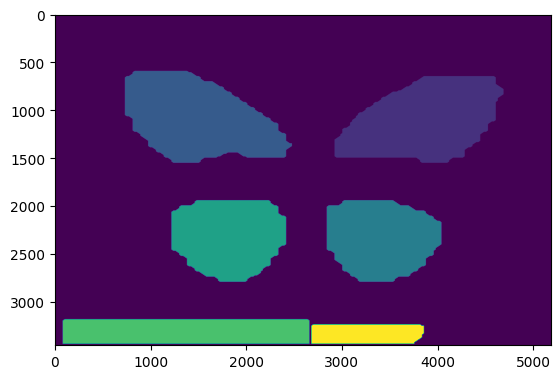

In [23]:
#creating a segmentation mask for our entire image where
#pixel values are just class id's (similar output to unet masks)
#use xyn (normalized xy coordinates) to take masks from a smaller img and display them on original size image

import numpy as np
from skimage.draw import polygon2mask

test_img_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/meier_images_256_256/CAM016012_d.png'
results = model.predict(test_img_path, verbose=False)

#load test image
img_256 = cv2.imread(test_img_path, 1)
img_256 = cv2.cvtColor(img_256, cv2.COLOR_BGR2RGB)

img_full_path = '/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/meier_images/CAM016012_d.JPG'
img_full = cv2.imread(img_full_path, 1)
img_full = cv2.cvtColor(img_full, cv2.COLOR_BGR2RGB)

print(img_full.shape)

#create an empty array to add our masks onto
segmented_img_full = np.zeros(img_full[:,:,0].shape, dtype='uint8')

for r in results:
    predicted_class_ids = r.boxes.cls.tolist()
    xyn_masks = r.masks.xyn
    for i, class_id in enumerate(predicted_class_ids):
        #get coordinates of polygon
        coords = xyn_masks[i]
        
        #polygon2mask expects coordinates in y,x order so reorder
        #since we're using the normalized xy coordinates, we also multiple x and y 
        #by the target image's width and height so that our masks scale and fit the target img
        coords_adj = [[y * img_full.shape[0], x * img_full.shape[1]] for [x,y] in coords] 

        #build mask
        polygon = np.array(coords_adj)
        mask = polygon2mask(img_full[:,:,0].shape, polygon).astype("uint8")

        #assign the class id as the pixel value for the segment such that
        #instead of 1s and 0s, it'll be class_id's and 0's
        mask *= int(class_id) 

        #layer the current segment into one collective mask
        segmented_img_full += mask

        for y in range(0, segmented_img_full.shape[0]):
            for x in range(0, segmented_img_full.shape[1]):
                #if there masks overlap at y,x
                if mask[y, x] != 0 and segmented_img_full[y,x] != 0:
                    #replace that value to avoid pixel values not in our id2label mapping
                    segmented_img_full[y,x] = mask[y,x]
        
        # segmented_img = cv2.bitwise_and(img, img, mask=mask)

print(np.unique(segmented_img_full))
plt.imshow(segmented_img_full)

In [24]:
segmented_img_full.shape
import os 

os.makedirs('/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation-masks', exist_ok=True)
cv2.imwrite('/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation-masks/segmented_img_full.png', segmented_img_full)

True

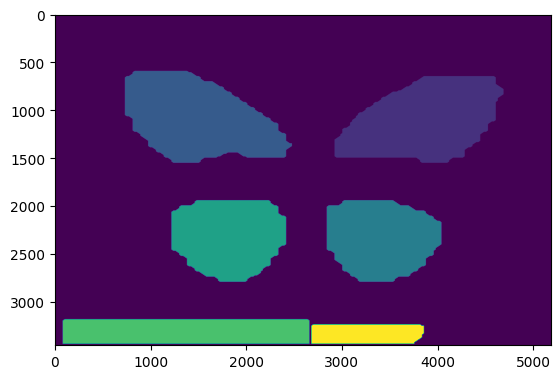

In [25]:
mask = cv2.imread('/fs/ess/PAS2136/Butterfly/butterfly_image_segmentation/yolo-wing-segmentation-masks/segmented_img_full.png', 0)
plt.imshow(mask)